# Pratiquer l'algorithme du DBSCAN sur le dataset des fleurs d'iris

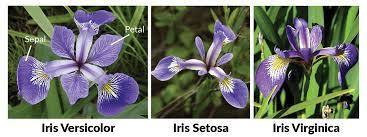

In [ ]:
library("IRdisplay")
display_png(file="iris.jfif") 

    - Dans la partie suivante, nous montrerons comment utiliser DBSCAN pour effectuer un clustering basé sur la densité.

In [ ]:
# pour ignorer les warning
options(warn=-1)

## Instalation de l'algorethme

In [ ]:
#install.packages("dbscan")

In [ ]:
library(dbscan)

## Chargement du dataset 
- vous pouvez choisir votre propre dataset pour travailler avec

set.seed(0)
n <- 400

iris_data <- cbind(x = runif(4, 0, 1) + rnorm(n, sd = 0.1),
           y = runif(4, 0, 1) + rnorm(n, sd = 0.1))

In [ ]:
# En eliminanr aussi la dernier colonne (content des noms)
iris_data <- as.matrix(iris[, -5])

## Détermination de la valeur optimale d'epselon (eps):

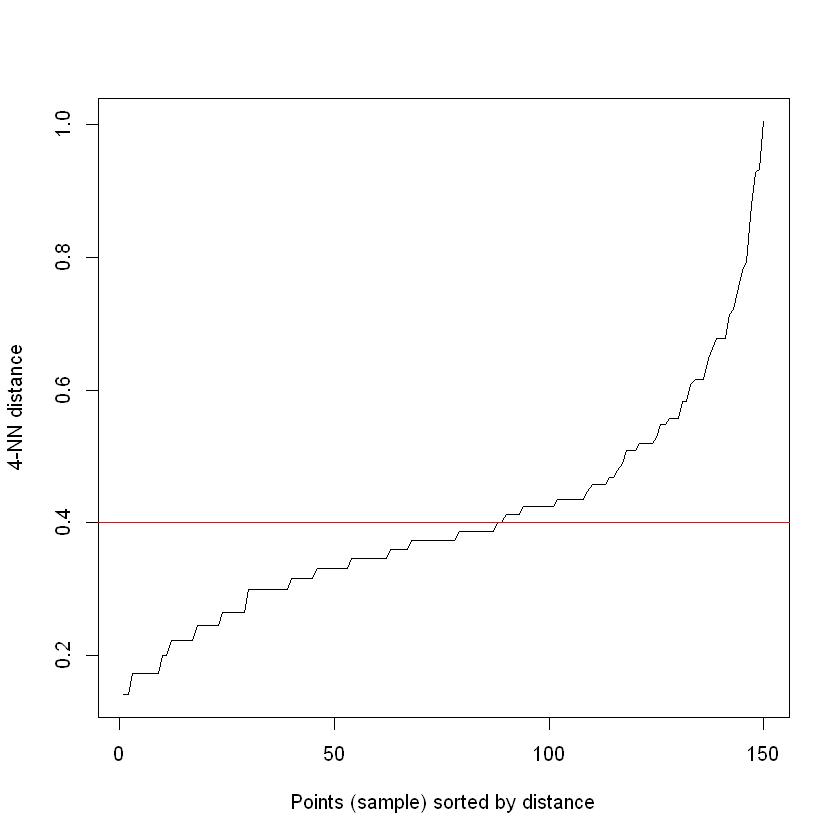

In [ ]:
kNNdistplot(iris_data, k=4)
abline(h=0.4, col="red")

    - On peut voir que la valeur eps optimale se situe autour d'une distance de 0,4.

In [ ]:
set.seed(20)
db = dbscan(iris_data, 0.4, 4)
db

DBSCAN clustering for 150 objects.
Parameters: eps = 0.4, minPts = 4
The clustering contains 4 cluster(s) and 25 noise points.

 0  1  2  3  4 
25 47 38 36  4 

Available fields: cluster, eps, minPts

    - Le résultat montre que DBSCAN a trouvé 4 clusters et attribué 25 cas comme bruit/valeurs aberrantes.

## Afficher les clusters

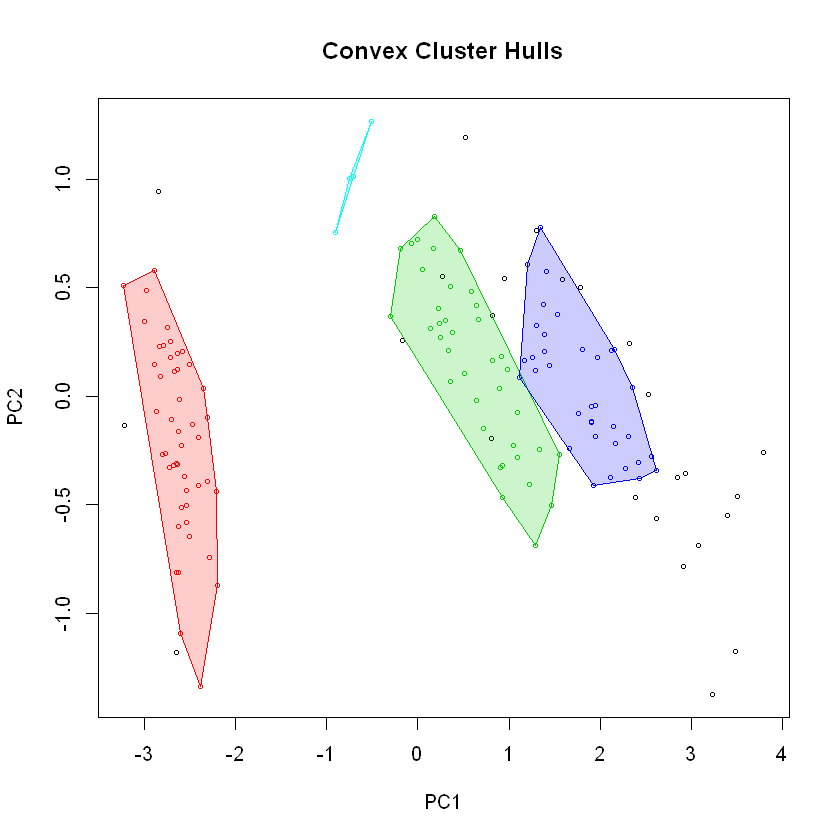

In [ ]:
hullplot(iris_data, db$cluster)

    - Vous pouvez jouer avec eps (taille du quartier) et MinPts (minimum de points nécessaires pour le cluster central).

## Comparer la quantité de données au sein de chaque cluster

In [ ]:
table(iris$Species, db$cluster)

            
              0  1  2  3  4
  setosa      3 47  0  0  0
  versicolor  5  0 38  3  4
  virginica  17  0  0 33  0

- Effectuez les étapes suivantes pour comparer les méthodes de clustering.

- Tout d'abord, installez et chargez le fpc package

In [ ]:
#install.packages("fpc")

In [ ]:
library("fpc")


Attaching package: 'fpc'

The following object is masked from 'package:dbscan':

    dbscan



## Ensuite, récupérez les statistiques de validation de cluster de la méthode de clustering :

In [ ]:
cs = cluster.stats(dist(iris[1:4]), db$cluster)

In [ ]:
cs[c("within.cluster.ss","avg.silwidth")]

$within.cluster.ss
[1] 155.6084

$avg.silwidth
[1] 0.3252555

## Vue globale du dataset apres clustring

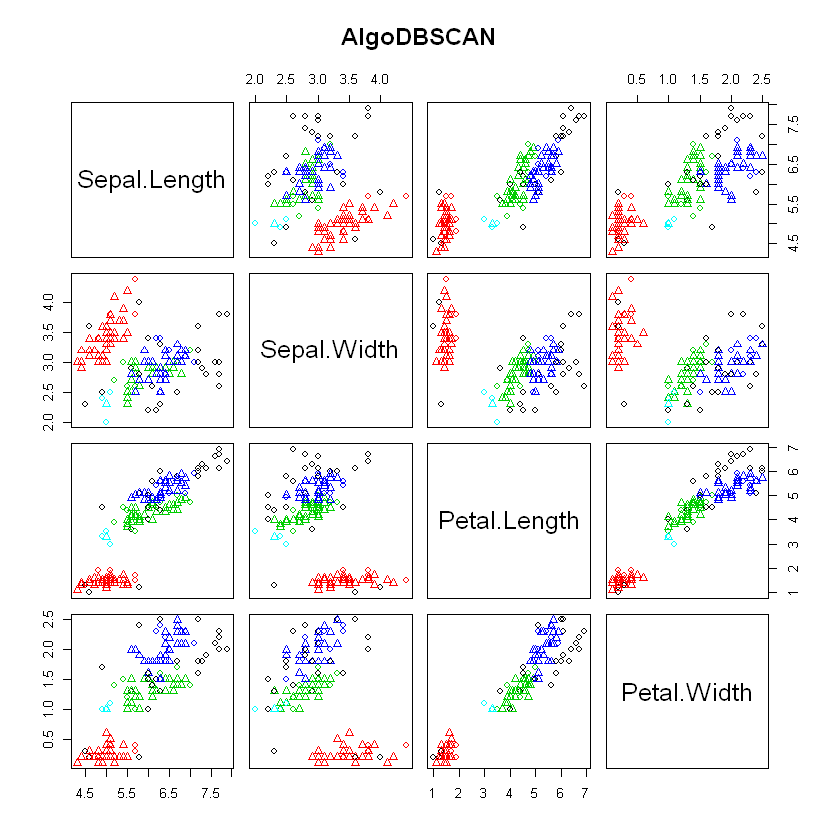

In [ ]:
set.seed(20)
DS = dbscan(iris_data, 0.4, 4)
plot(DS, iris[,-5],main="AlgoDBSCAN")

## 1)Avantages

    - Ne nécessite pas de spécifier au préalable le nombre de clusters.(flux de données en évolution, le nombre de clusters naturels change souvent)
    - Fonctionne bien avec les clusters de formes arbitraires.
    - DBSCAN est robuste aux valeurs aberrantes et capable de détecter les valeurs aberrantes.
    - Utilise uniquement 2 paramètres, qui peuvent être spécifié par l’expert
    
## 2)Inconvénients

    - Dans certains cas, il n'est pas facile de déterminer le bon(eps) et cela nécessite une connaissance du domaine.
    - Sensible aux paramètres, c'est-à-dire difficile à déterminer le bon ensemble de paramètres.
    - Si les clusters sont très différents en termes de densités dans le cluster, DBSCAN n'est pas bien adapté pour définir des clusters. .
    - DBSCAN ne peut pas regrouper correctement les ensembles de données avec de grandes différences de densité.


## fin.